## Data Modeling and Explainability

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:

df = pd.read_csv("Healthcare Dataset.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df = df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap"})

In [6]:
# Select features and target
X = df[["Age", "Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap", "SMS_received"]]
y = df["No-show"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)


Decision Tree Accuracy: 0.7991043155704334


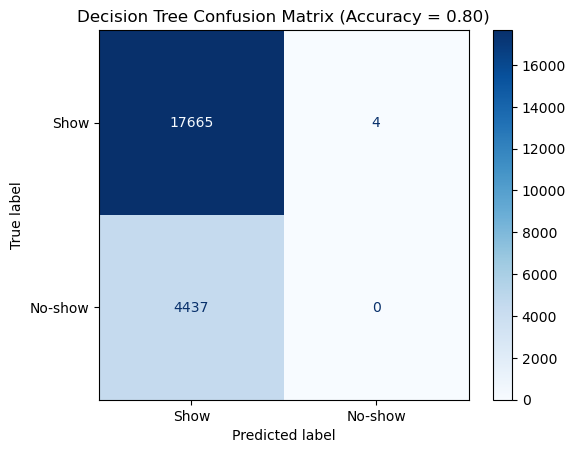

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Show", "No-show"])
disp.plot(cmap="Blues")
plt.title(f"Decision Tree Confusion Matrix (Accuracy = {acc:.2f})")
plt.show()

In [ ]:
#  Feature Importance

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

C:\Users\Rohan\AppData\Local\Temp\ipykernel_16820\1659240763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


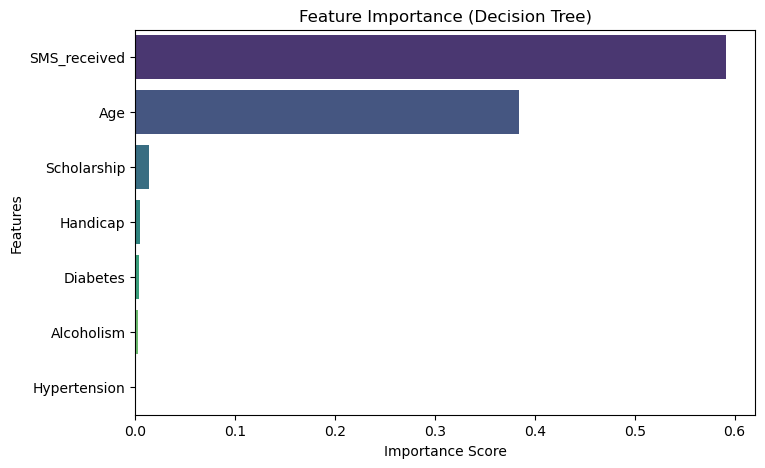

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [29]:
feat_importance = pd.DataFrame({
    "Feature": features[indices],
    "Importance": importances[indices]
})
feat_importance.to_csv("feature_importance.csv",index=False)

In [22]:
# Export Predictions

df_results = X_test.copy()
df_results["Actual"] = y_test.values
df_results["Predicted"] = y_pred
df_results.to_csv("model_predictions.csv", index=False)
